# Exploring the Weather in Athens


The purpose of this assignment is to gain insight about the weather in Athens and the impact of climate change through the examination of data over a period of more than 50 years.

---
> Natalia Katsiapi, 810040 <br/>
> Department of Management Science and Technology <br/>
> Athens University of Economics and Business <br/>
> t8180040@aueb.gr

## Obtain the Data

The data for the Hellinikon weather station can be obtained from National Oceanic and Atmospheric Administration's National Centers for Environmental Information (https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:GR000016716/detail) in CSV format.

They are ready to be loaded with Pandas.

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

data = pd.read_csv("athens_data.csv", parse_dates=["DATE"])
data

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,1955-01-01,0.00,NaN,NaN,65.0,50.0
1,GR000016716,1955-01-02,0.08,NaN,NaN,58.0,45.0
2,GR000016716,1955-01-03,0.00,NaN,NaN,60.0,49.0
3,GR000016716,1955-01-04,0.00,NaN,NaN,66.0,45.0
4,GR000016716,1955-01-05,0.00,NaN,NaN,64.0,47.0
...,...,...,...,...,...,...,...
23246,GR000016716,2020-12-27,0.00,NaN,62.0,NaN,NaN
23247,GR000016716,2020-12-28,0.26,NaN,59.0,65.0,53.0
23248,GR000016716,2020-12-29,0.00,NaN,61.0,68.0,54.0
23249,GR000016716,2020-12-30,0.00,NaN,62.0,68.0,59.0


In [99]:
def fahrenheit_to_celsius(t):
    return 5/9 * (t - 32)

data[["TAVG", "TMAX", "TMIN"]] = data[["TAVG", "TMAX", "TMIN"]].apply(fahrenheit_to_celsius)
data

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,1955-01-01,0.00,NaN,NaN,18.333333,10.000000
1,GR000016716,1955-01-02,0.08,NaN,NaN,14.444444,7.222222
2,GR000016716,1955-01-03,0.00,NaN,NaN,15.555556,9.444444
3,GR000016716,1955-01-04,0.00,NaN,NaN,18.888889,7.222222
4,GR000016716,1955-01-05,0.00,NaN,NaN,17.777778,8.333333
...,...,...,...,...,...,...,...
23246,GR000016716,2020-12-27,0.00,NaN,16.666667,NaN,NaN
23247,GR000016716,2020-12-28,0.26,NaN,15.000000,18.333333,11.666667
23248,GR000016716,2020-12-29,0.00,NaN,16.111111,20.000000,12.222222
23249,GR000016716,2020-12-30,0.00,NaN,16.666667,20.000000,15.000000


As we notice, a significant number of average temperatures is missing till 1974.

In [100]:
data.DATE[data.TAVG.isna()]

0       1955-01-01
1       1955-01-02
2       1955-01-03
3       1955-01-04
4       1955-01-05
           ...    
7166    1974-08-15
7167    1974-08-16
7455    1975-05-31
7958    1976-10-15
16080   1999-01-10
Name: DATE, Length: 2311, dtype: datetime64[ns]

In [101]:
before_2010 = data.DATE.dt.year < 2010
# Cannot do inplace=True
data.loc[before_2010, 'TAVG'] = data.loc[before_2010, 'TAVG'].fillna(value=(data.TMAX + data.TMIN) / 2)

In [102]:
data[data.TAVG.isna()]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
798,GR000016716,1957-03-09,0.01,NaN,NaN,16.666667,NaN


We still have a date with null values, since TMIN is NaN. What we can do is use the average of the previous and the next year.

In [103]:
data.TAVG.iloc[798] = (data.iloc[797].TAVG + data.iloc[799].TAVG) / 2
data.iloc[797:800]

C:\Users\kat26\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
797,GR000016716,1957-03-08,0.02,NaN,13.611111,17.222222,10.000000
798,GR000016716,1957-03-09,0.01,NaN,11.805556,16.666667,NaN
799,GR000016716,1957-03-10,0.00,NaN,10.000000,12.222222,7.777778


Now we will examine TMAX and TMIN columns.

In [104]:
data[data.TMAX.isna() | data.TMIN.isna()]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
798,GR000016716,1957-03-09,0.01,NaN,11.805556,16.666667,NaN
4119,GR000016716,1966-04-12,0.00,NaN,17.777778,22.222222,NaN
4335,GR000016716,1966-11-14,0.00,NaN,17.222222,19.444444,NaN
9102,GR000016716,1979-12-03,0.04,NaN,15.000000,NaN,NaN
18266,GR000016716,2005-01-04,0.00,NaN,8.333333,NaN,NaN
...,...,...,...,...,...,...,...
23229,GR000016716,2020-12-10,NaN,NaN,14.444444,NaN,NaN
23232,GR000016716,2020-12-13,0.35,NaN,14.444444,NaN,12.222222
23233,GR000016716,2020-12-14,0.00,NaN,12.222222,NaN,11.111111
23246,GR000016716,2020-12-27,0.00,NaN,16.666667,NaN,NaN


We will calculate them, based on the previous logic, using TAVG.

In [105]:
data.loc[before_2010, 'TMAX'] = data.loc[before_2010, 'TMAX'].fillna(value=2 * data.TAVG - data.TMIN)
data.loc[before_2010, 'TMIN'] = data.loc[before_2010, 'TMIN'].fillna(value=2 * data.TAVG - data.TMAX)
data[data.TMAX.isna() | data.TMIN.isna()]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
9102,GR000016716,1979-12-03,0.04,NaN,15.000000,NaN,NaN
18266,GR000016716,2005-01-04,0.00,NaN,8.333333,NaN,NaN
18289,GR000016716,2005-01-27,NaN,NaN,12.777778,NaN,NaN
18293,GR000016716,2005-01-31,0.44,NaN,5.555556,NaN,NaN
18296,GR000016716,2005-02-03,NaN,NaN,3.888889,NaN,NaN
...,...,...,...,...,...,...,...
23229,GR000016716,2020-12-10,NaN,NaN,14.444444,NaN,NaN
23232,GR000016716,2020-12-13,0.35,NaN,14.444444,NaN,12.222222
23233,GR000016716,2020-12-14,0.00,NaN,12.222222,NaN,11.111111
23246,GR000016716,2020-12-27,0.00,NaN,16.666667,NaN,NaN


There are still missing values, however for the time being they do not have an impact on our analysis. The same goes for percipitation. For the sake of completeness we will fill them with an average of values before 2010.

In [106]:
data.loc[before_2010, 'TMIN'] = data.loc[before_2010, 'TMIN'].fillna(value=data.loc[before_2010, 'TMIN'].mean())
data.loc[before_2010, 'TMAX'] = data.loc[before_2010, 'TMAX'].fillna(value=data.loc[before_2010, 'TMAX'].mean())
data.loc[before_2010, 'PRCP'] = data.loc[before_2010, 'PRCP'].fillna(value=data.loc[before_2010, 'PRCP'].mean())
data[data.TMAX.isna() | data.TMIN.isna() | data.PRCP.isna()]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
20086,GR000016716,2010-01-01,NaN,NaN,17.777778,21.666667,NaN
20095,GR000016716,2010-01-10,0.00,NaN,13.888889,16.666667,NaN
20101,GR000016716,2010-01-16,0.00,NaN,10.555556,NaN,NaN
20104,GR000016716,2010-01-19,NaN,NaN,8.888889,11.666667,NaN
20107,GR000016716,2010-01-22,0.00,NaN,7.777778,10.000000,NaN
...,...,...,...,...,...,...,...
23232,GR000016716,2020-12-13,0.35,NaN,14.444444,NaN,12.222222
23233,GR000016716,2020-12-14,0.00,NaN,12.222222,NaN,11.111111
23244,GR000016716,2020-12-25,NaN,NaN,15.000000,19.444444,12.777778
23246,GR000016716,2020-12-27,0.00,NaN,16.666667,NaN,NaN


The same steps will be repeated for the 2020 dates.

In [107]:
dates_2020 = data.DATE.dt.year == 2020
data.loc[dates_2020 & data.TMIN.isna()]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
22885,GR000016716,2020-01-01,0.00,NaN,8.333333,11.666667,NaN
22889,GR000016716,2020-01-05,0.00,NaN,9.444444,13.333333,NaN
22890,GR000016716,2020-01-06,0.26,NaN,5.555556,7.222222,NaN
22901,GR000016716,2020-01-17,0.00,NaN,10.000000,11.666667,NaN
22905,GR000016716,2020-01-21,0.00,NaN,7.777778,9.444444,NaN
22911,GR000016716,2020-01-27,0.00,NaN,13.333333,17.777778,NaN
22914,GR000016716,2020-01-30,0.00,NaN,14.444444,18.333333,NaN
22920,GR000016716,2020-02-05,0.00,NaN,12.222222,16.111111,NaN
22923,GR000016716,2020-02-08,0.00,NaN,5.555556,8.888889,NaN
22930,GR000016716,2020-02-15,0.04,NaN,12.222222,NaN,NaN


There are also a couple of missing values for ```TMIN``` and ```TMAX```. They don't interfere with iur analysis so we will just replace the with te average.

In [108]:
data.loc[dates_2020, 'TMAX'] = data.loc[dates_2020, 'TMAX'].fillna(value=data.loc[dates_2020, 'TMAX'].mean())
data.loc[dates_2020, 'TMIN'] = data.loc[dates_2020, 'TMIN'].fillna(value=data.loc[dates_2020, 'TMIN'].mean())
data.loc[dates_2020, 'PRCP'] = data.loc[dates_2020, 'PRCP'].fillna(value=data.loc[dates_2020, 'PRCP'].mean())
data[data.TMAX.isna() | data.TMIN.isna() | data.PRCP.isna()]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
20086,GR000016716,2010-01-01,NaN,NaN,17.777778,21.666667,NaN
20095,GR000016716,2010-01-10,0.00,NaN,13.888889,16.666667,NaN
20101,GR000016716,2010-01-16,0.00,NaN,10.555556,NaN,NaN
20104,GR000016716,2010-01-19,NaN,NaN,8.888889,11.666667,NaN
20107,GR000016716,2010-01-22,0.00,NaN,7.777778,10.000000,NaN
...,...,...,...,...,...,...,...
22865,GR000016716,2019-12-12,0.43,NaN,12.222222,NaN,10.000000
22867,GR000016716,2019-12-14,0.02,NaN,13.333333,NaN,11.666667
22881,GR000016716,2019-12-28,0.00,NaN,8.333333,10.555556,NaN
22883,GR000016716,2019-12-30,0.18,NaN,4.444444,7.777778,NaN


Now we will move on to the dates starting from 2010, for which we have a second dataset. Dataset's headings were found [here](https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f/resource/a7c024b3-8606-4f08-93e2-2042f5bd6748). We will keep only the needed columns.

In [109]:
data.DATE.isna
# data.loc[(data.DATE >= "2010-01-02") & (data.DATE <= "2019-12-31"), "DATE"]

<bound method Series.isna of 0       1955-01-01
1       1955-01-02
2       1955-01-03
3       1955-01-04
4       1955-01-05
           ...    
23246   2020-12-27
23247   2020-12-28
23248   2020-12-29
23249   2020-12-30
23250   2020-12-31
Name: DATE, Length: 23251, dtype: datetime64[ns]>

In [110]:
recent_data = pd.read_csv("athens.csv")
recent_data.columns = range(14)
recent_data = recent_data[[0, 1, 2, 3, 5]]
recent_data.columns = ["date", "avgt", "maxt", "mint", "prcpt"]
recent_data.date = pd.to_datetime(recent_data.date)


If we see the data types, columns are not numeric, and can neither be converted due to line 513.

In [111]:
recent_data.loc[513]

date     2011-05-30 00:00:00
avgt                     ---
maxt                     ---
mint                     ---
prcpt                     81
Name: 513, dtype: object

So, we will delete it.

In [112]:
recent_data.drop(recent_data[recent_data.avgt == "---"].index, inplace=True)


In [113]:
recent_data[["avgt", "maxt", "mint", "prcpt"]] = recent_data[["avgt", "maxt", "mint", "prcpt"]].apply(pd.to_numeric, errors='coerce', axis=1)


It would be easy to replace the part which is greater than 2010-01-02 with the recent dataset. However, as we see, they are not of the same shape.

In [114]:
recent_data.loc[recent_data['date'] >= "2010-01-02", 'date']

0      2010-01-02
1      2010-01-03
2      2010-01-04
3      2010-01-05
4      2010-01-06
          ...    
3646   2019-12-27
3647   2019-12-28
3648   2019-12-29
3649   2019-12-30
3650   2019-12-31
Name: date, Length: 3648, dtype: datetime64[ns]

Obviously some dates from the original dataset are missing. In order to be able to use the information from the aother dataset, it will be easier to join them with ```merge```. We will select outer join, so that we will be able to add the missing dates.

In [115]:
data = pd.merge(data, recent_data, how="outer", left_on='DATE', right_on='date')
data.tail(10)

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,date,avgt,maxt,mint,prcpt
24093,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-09-10,26.5,26.6,26.4,88.0
24094,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-09-20,26.8,26.9,26.7,64.0
24095,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-09-21,24.0,24.1,23.9,58.0
24096,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-09-23,22.4,22.5,22.3,61.0
24097,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-09-27,22.1,22.2,22.0,86.0
24098,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-10-02,18.7,18.8,18.6,77.0
24099,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-10-08,17.8,17.9,17.7,64.0
24100,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-10-15,20.4,20.5,20.3,65.0
24101,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-10-27,17.8,17.9,17.7,81.0
24102,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2018-09-17,26.3,26.3,26.2,62.0


In [116]:
data.DATE.fillna(value=data.date, inplace=True)
data.PRCP.fillna(value=data.prcpt, inplace=True)
data.TAVG.fillna(value=data.avgt, inplace=True)
data.TMAX.fillna(value=data.maxt, inplace=True)
data.TMIN.fillna(value=data.mint, inplace=True)
data[data.TMAX.isna() | data.TMIN.isna() | data.PRCP.isna()]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,date,avgt,maxt,mint,prcpt
20086,GR000016716,2010-01-01,NaN,NaN,17.777778,21.666667,NaN,NaT,NaN,NaN,NaN,NaN


We still have 01-01-2010, where percipitation and minimum temperature is missing. We can calculate it based on the previous and the next values.

In [117]:
data.PRCP.iloc[20086] = (data.iloc[20085].PRCP + data.iloc[20087].PRCP) / 2
data.TMIN.iloc[20086] = (data.iloc[20085].TMIN + data.iloc[20087].TMIN) / 2
data.iloc[20085:20088]

C:\Users\kat26\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,date,avgt,maxt,mint,prcpt
20085,GR000016716,2009-12-31,0.0,NaN,14.444444,19.444444,9.444444,NaT,NaN,NaN,NaN,NaN
20086,GR000016716,2010-01-01,0.0,NaN,17.777778,21.666667,11.666667,NaT,NaN,NaN,NaN,NaN
20087,GR000016716,2010-01-02,0.0,NaN,16.111111,17.777778,13.888889,2010-01-02,15.6,15.7,15.5,70.0


We will drop the unnecessary columns and have some statistics to see if generally we can continue with the analysis.


In [118]:
data.drop(columns=['date', 'avgt', 'maxt', 'mint', 'prcpt'], inplace=True)
data
data.describe()

,PRCP,SNWD,TAVG,TMAX,TMIN
count,24103.000000,30.000000,24103.000000,24103.000000,24103.000000
mean,2.953361,6.006667,18.362447,22.178008,14.712090
std,14.586125,13.950922,6.905348,7.403353,6.581722
min,0.000000,0.400000,-2.222222,0.900000,-4.444444
25%,0.000000,0.400000,12.777778,16.666667,9.444444
50%,0.000000,0.800000,17.777778,21.666667,14.444444
75%,0.000000,1.600000,24.444444,28.333333,20.000000
max,95.000000,48.800000,35.000000,42.222222,34.700000


## Q2: Deviation of Summer Temperatures


We will start by obtaining the data from 1974 and afterwards.

In [119]:
recent_df = data.loc[data.DATE.dt.year >= 1974]
recent_df

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
6940,GR000016716,1974-01-01,0.00,NaN,11.666667,12.777778,10.000000
6941,GR000016716,1974-01-02,0.00,NaN,13.888889,15.555556,11.111111
6942,GR000016716,1974-01-03,0.39,NaN,12.222222,16.111111,10.555556
6943,GR000016716,1974-01-04,0.00,NaN,10.555556,12.777778,8.333333
6944,GR000016716,1974-01-05,0.00,NaN,9.444444,11.111111,8.333333
...,...,...,...,...,...,...,...
24098,NaN,2017-10-02,77.00,NaN,18.700000,18.800000,18.600000
24099,NaN,2017-10-08,64.00,NaN,17.800000,17.900000,17.700000
24100,NaN,2017-10-15,65.00,NaN,20.400000,20.500000,20.300000
24101,NaN,2017-10-27,81.00,NaN,17.800000,17.900000,17.700000


Then, we will need to group by year to calculate the average yearly temperature.

In [120]:
summer = recent_df[recent_df.DATE.dt.month.between(6,8)]
summer_grouped = summer.groupby(data.DATE.dt.year)
summer_grouped

In [121]:
summer_mean = summer.TAVG.mean()
deviations = []
for n, s in summer_grouped:
    deviation = s.TAVG.mean() - summer_mean
    deviations.append(deviation)
summer_devs = pd.DataFrame({
    "year": summer_grouped.groups.keys(),
    "dev": deviations
})
summer_devs.head(3)

,year,dev
0,1974,-0.491534
1,1975,-1.007838
2,1976,-2.100834


In [122]:
years = recent_df.groupby(data.DATE.dt.year)
years.mean().head(3)

,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,
1974,0.036137,NaN,18.089041,21.789954,14.517504
1975,0.041260,NaN,18.162861,21.814307,14.491629
1976,0.053525,NaN,17.440043,20.986642,13.778081


In [90]:
# sns.lineplot(x='size',y='total_bill', data=summer_devs)


D:\Programs\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 2160x1080 with 0 Axes>

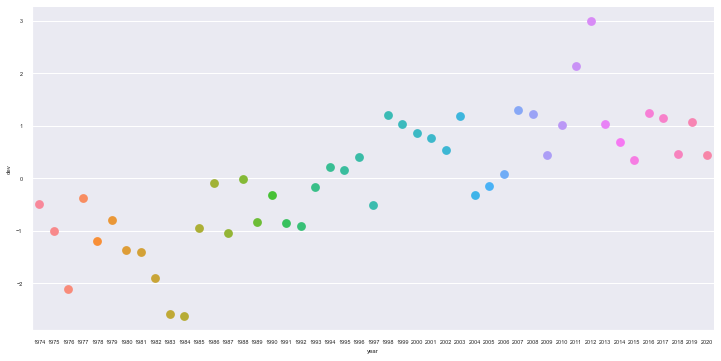

In [143]:
# sns.set_theme()
# plt.style.use('ggplot')
sns.set_style("darkgrid")
plt.figure(figsize=(30,15))
# sns.set_context("notebook", font_scale = .5, rc={"bars.barwidth": 0.8})
# sns.plot

ax = sns.factorplot(x="year", y="dev", data=summer_devs, aspect=2, hue="year")
# ax.set_xticks(range(0, 75, 2))
# _ = ax.set_xticklabels(range(0, 75, 2))# plt.bar(x="year", width=0.05, height=0.04, data=summer_devs)

In [92]:
data['YEAR'] = data.DATE.dt.year
data['DAY'] = data.DATE.dt.dayofyear
recent_df['DAY'] = recent_df.DATE.dt.dayofyear
data['MONTH'] = None

D:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
# average_per_year = []
# for n, v in years:
#     month_grouping = v.groupby(v.DATE.dt.month)
#     average_per_year.append(month_grouping.TAVG.mean())
# new_with_months = pd.concat(average_per_year)
# new_with_months

mean_per_month_year = data.groupby("YEAR").mean()
mean_per_month_year

,PRCP,SNWD,TAVG,TMAX,TMIN,DAY
YEAR,,,,,,
1955,0.059041,NaN,18.779300,23.164384,14.394216,183.0
1956,0.030273,NaN,18.153461,22.577413,13.729508,183.5
1957,0.032630,NaN,18.390791,22.622527,14.226027,183.0
1958,0.037781,NaN,18.694064,22.916286,14.800609,183.0
1959,0.023068,NaN,17.919330,22.057839,13.780822,183.0
...,...,...,...,...,...,...
2016,6.206503,0.600000,19.375440,20.898998,15.933698,183.5
2017,7.451342,0.400000,19.175221,20.559452,15.755799,183.0
2018,1.276521,0.400000,19.504323,23.163044,16.088189,183.0


<AxesSubplot:xlabel='DAY', ylabel='TAVG'>

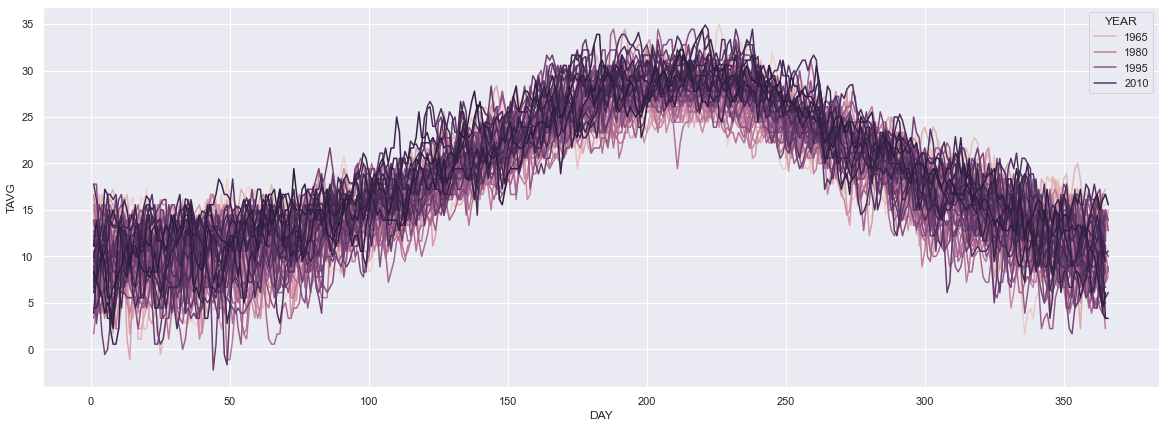

In [94]:
fig, axes = plt.subplots(figsize=(20,7))
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months = mdates.MonthLocator()  # every month
sns.lineplot(x="DAY", y="TAVG", data=data, hue="YEAR")


In [95]:
data['30day_rolling_avg'] = data.TAVG.rolling(30).mean()
data.tail(60)

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,YEAR,DAY,MONTH,30day_rolling_avg
24043,NaN,2014-08-28,74.0,NaN,30.0,30.1,29.8,2014,240,None,29.166667
24044,NaN,2014-08-29,64.0,NaN,27.9,27.9,27.8,2014,241,None,29.176667
24045,NaN,2014-08-30,62.0,NaN,26.5,26.6,26.4,2014,242,None,29.080000
24046,NaN,2014-08-31,60.0,NaN,27.0,27.1,26.9,2014,243,None,29.003333
24047,NaN,2014-09-01,73.0,NaN,26.7,26.8,26.6,2014,244,None,28.970000
24048,NaN,2014-09-02,79.0,NaN,26.4,26.5,26.3,2014,245,None,28.876667
24049,NaN,2014-09-03,68.0,NaN,27.1,27.2,27.0,2014,246,None,28.780000
24050,NaN,2014-09-04,68.0,NaN,26.7,26.8,26.6,2014,247,None,28.653333
24051,NaN,2014-09-05,70.0,NaN,26.7,26.9,26.6,2014,248,None,28.626667
24052,NaN,2014-09-06,78.0,NaN,25.8,25.9,25.7,2014,249,None,28.640000


In [96]:
recent_df['30day_rolling_avg'] = data.TAVG.rolling(30).mean()
data['recent_30day_rolling_avg'] = recent_df['30day_rolling_avg']
data

D:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,YEAR,DAY,MONTH,30day_rolling_avg,recent_30day_rolling_avg
0,GR000016716,1955-01-01,0.00,NaN,14.166667,18.333333,10.000000,1955,1,None,NaN,NaN
1,GR000016716,1955-01-02,0.08,NaN,10.833333,14.444444,7.222222,1955,2,None,NaN,NaN
2,GR000016716,1955-01-03,0.00,NaN,12.500000,15.555556,9.444444,1955,3,None,NaN,NaN
3,GR000016716,1955-01-04,0.00,NaN,13.055556,18.888889,7.222222,1955,4,None,NaN,NaN
4,GR000016716,1955-01-05,0.00,NaN,13.055556,17.777778,8.333333,1955,5,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
24098,NaN,2017-10-02,77.00,NaN,18.700000,18.800000,18.600000,2017,275,NaN,22.530000,22.530000
24099,NaN,2017-10-08,64.00,NaN,17.800000,17.900000,17.700000,2017,281,NaN,22.426667,22.426667
24100,NaN,2017-10-15,65.00,NaN,20.400000,20.500000,20.300000,2017,288,NaN,22.416667,22.416667
24101,NaN,2017-10-27,81.00,NaN,17.800000,17.900000,17.700000,2017,300,NaN,22.320000,22.320000


AttributeError: 'Line2D' object has no property 'ax'

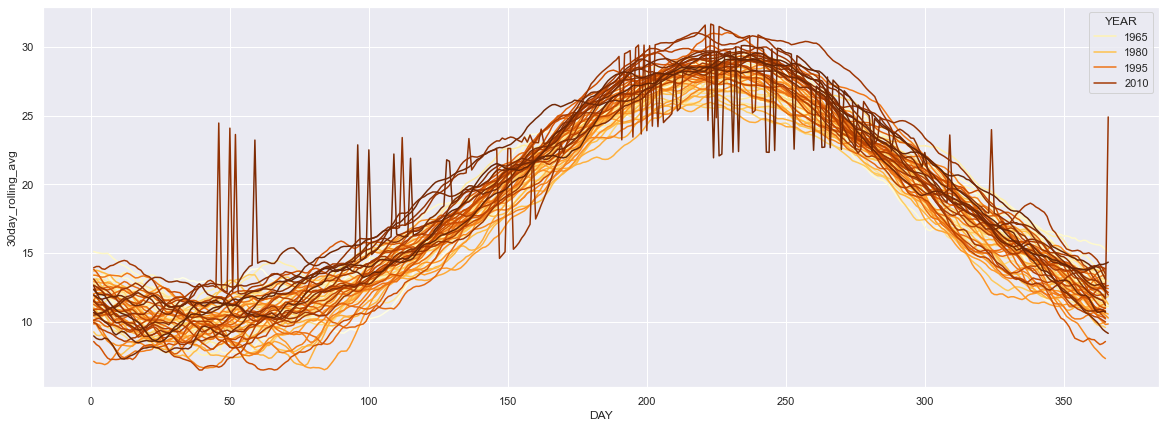

In [97]:
fig, axes = plt.subplots(figsize=(20,7))
ax = sns.lineplot(x="DAY", y="30day_rolling_avg", data=data, hue="YEAR", palette="YlOrBr")
plt.plot(data["recent_30day_rolling_avg"], ax=ax)

In [ ]:
sns.lineplot(x="DAY", y="30day_rolling_avg", data=data, hue="YEAR", palette="YlOrBr")